# 基于 TFIDF 的 KMeans 的文本聚类
- 使用 sklearn、pandas、numpy、nltk 等工具对文本数据进行预处理得到向量化的文本表示
- 使用 sklearn 中的 KMeans 方法对已经向量化的文本进行聚类，并使用手肘法进行聚类簇数量的选择

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 数据集数据处理

In [6]:
# 读取数据
data = pd.read_csv('./abcnews-date-text(1).csv')
data = data.head(10000) # 取部分数据

In [7]:
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
9995,20030407,vic govt plan aims to reduce water use
9996,20030407,vic govt urged to green light marina plan
9997,20030407,vic nats leave door open on coalition
9998,20030407,waterfall survivors tell of train speeding before


<font color = 'red' size= 5 > pd.DataFrame.duplicate </font>
- 查看重复的数据行，pandas.DataFrame.duplicated 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

- 删除重复行，pandas.DataFrame.drop_duplicates 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html


In [12]:
# 查看重复数据
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text')

,publish_date,headline_text
9253,20030404,5 australian sars cases being monitored
9458,20030405,5 australian sars cases being monitored
6402,20030322,all walks of life follow protest path
6192,20030321,all walks of life follow protest path
6197,20030321,asio briefs crean on terrorist risk
...,...,...
6396,20030321,wildcats crush hawks
6596,20030322,wildcats crush hawks
5510,20030317,woman dies in car crash
5030,20030314,woman dies in car crash


In [13]:
data = data.drop_duplicates('headline_text')

## 数据预处理

1. 分词

In [15]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_word  = text.ENGLISH_STOP_WORDS.union(punc) # punc加入到停用词，并集
stop_word

frozenset({'!',
           '"',
           '%',
           "'",
           '(',
           ')',
           ',',
           '.',
           ':',
           ';',
           '?',
           '[',
           ']',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
    

<font color = 'red' size= 5 > TfidfVectorizer </font>  
使用方法详见：http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  

原理：https://zhuanlan.zhihu.com/p/67883024

In [22]:
vectorizer = TfidfVectorizer(stop_words = stop_word)
desc = data['headline_text'].values
X = vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names()

In [23]:
desc

array(['aba decides against community broadcasting licence',
       'act fire witnesses must be aware of defamation',
       'a g calls for infrastructure protection summit', ...,
       'vic nats leave door open on coalition',
       'waterfall survivors tell of train speeding before',
       'water wont be moved without studies gallop'], dtype=object)

In [25]:
print(X)
X

  (0, 5110)	0.43981539702983696
  (0, 1310)	0.5065106433448784
  (0, 1975)	0.33006828555314244
  (0, 2456)	0.46960851333097303
  (0, 196)	0.46960851333097303
  (1, 2476)	0.536798704037279
  (1, 801)	0.5686921892748534
  (1, 9681)	0.49352194120053033
  (1, 267)	0.38062112231894385
  (2, 8533)	0.4745570580504975
  (2, 6786)	0.545425651133694
  (2, 4525)	0.5647311500231394
  (2, 1459)	0.3979763635360587
  (3, 7404)	0.3783359955921573
  (3, 6309)	0.37452108275719
  (3, 8441)	0.37966438032606903
  (3, 764)	0.3386920117463348
  (3, 8292)	0.41549345133692417
  (3, 5970)	0.3883302044801927
  (3, 390)	0.36647422376617234
  (4, 9045)	0.49868000492563264
  (4, 768)	0.35752659213658694
  (4, 334)	0.45847637525536333
  (4, 8441)	0.3725409751676253
  (4, 5970)	0.38104420788657495
  :	:
  (9962, 9525)	0.3242120823197961
  (9962, 6460)	0.31842499952604175
  (9963, 5366)	0.5143846975286045
  (9963, 9369)	0.33896505050545095
  (9963, 3928)	0.39497410184886594
  (9963, 5130)	0.42667487401702775
  (9963, 

<9967x9820 sparse matrix of type '<class 'numpy.float64'>'
	with 49738 stored elements in Compressed Sparse Row format>

In [26]:
print(len(word_features),word_features,sep='\n')

9820
['10', '100', '1000', '10000', '100000', '100m', '100th', '101st', '1035', '104', '105th', '106m', '108', '10m', '11', '110', '112pc', '114', '11b', '11pc', '12', '120', '1200', '125cc', '12b', '12m', '13', '130', '1300', '14', '14000', '14m', '15', '150', '15000', '155m', '158', '15th', '16', '160', '1600yo', '16m', '17', '170', '175m', '17m', '17pc', '18', '1800', '184m', '18500', '18th', '19', '191m', '192m', '1970', '1994', '19pc', '1b', '1m', '20', '200', '2000', '20000', '200000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '200m', '200th', '2014', '2060', '20m', '20pc', '21', '218m', '21m', '22', '220000', '23', '24', '242', '242m', '24m', '25', '250', '2500', '250000', '250k', '250th', '253', '257', '25m', '26', '260', '260000', '266', '27', '27m', '27th', '28', '2b', '2m', '30', '300', '30000', '300000', '300m', '302', '30m', '31', '314', '31m', '320', '32m', '33', '33000', '353', '360', '37', '370', '39', '40', '400', '4000', '40000', '400m', '41', '42', '437

2. stemming  
stemming 是将单词还原为词干（即词根形式）的过程。 词根形式不一定是单词本身，而是可以通过连接正确的后缀来生成单词。 例如，“fish”，“fishes”和“fishing”这几个词的词干都是“fish”，这是一个正确的单词。 另一方面，“study”，“studies”和“studying”一词源于“studi”，这不是一个正确的英语单词。

In [27]:
stemmer = SnowballStemmer('english')

3. 句子-->单词+标点 Tokenizing

<font color = 'red' size = 5> RegexpTokenizer </font>  
使用方法详见： https://www.kite.com/python/docs/nltk.RegexpTokenizer

In [40]:
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

In [41]:
def tokenize(text):
    """
    先进行 stemming 然后 tokenize
    params:
    text: 一个句子
    
    return:
    tokens 列表
    """
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

4. Tfidf向量化

In [45]:
vectorizer2 = TfidfVectorizer(stop_words = stop_word, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6909
['aa', 'aac', 'ab', 'aba', 'abalon', 'abandon', 'abar', 'abattoir', 'abbott', 'abc', 'abdic', 'abduct', 'abid', 'abigroup', 'abil', 'abl', 'ablaz', 'aboard', 'abolit', 'aborigin', 'abort', 'abov', 'abreast', 'abroad', 'absenc', 'absent', 'abu', 'abund', 'abus', 'abysm', 'ac', 'aca', 'academ', 'academi', 'acapulco', 'acb', 'accc', 'accent', 'accept', 'access', 'accid', 'accident', 'accommod', 'account', 'accredit', 'accus', 'ace', 'aceh', 'achiev', 'acid']


In [48]:
vectorizer3 = TfidfVectorizer(stop_words = stop_word, tokenizer = tokenize,max_features=1000)
X3 = vectorizer3.fit_transform(desc)
word_features3 = vectorizer3.get_feature_names()
print(len(word_features3))
print(word_features2[:50]) 
X3

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1000
['aa', 'aac', 'ab', 'aba', 'abalon', 'abandon', 'abar', 'abattoir', 'abbott', 'abc', 'abdic', 'abduct', 'abid', 'abigroup', 'abil', 'abl', 'ablaz', 'aboard', 'abolit', 'aborigin', 'abort', 'abov', 'abreast', 'abroad', 'absenc', 'absent', 'abu', 'abund', 'abus', 'abysm', 'ac', 'aca', 'academ', 'academi', 'acapulco', 'acb', 'accc', 'accent', 'accept', 'access', 'accid', 'accident', 'accommod', 'account', 'accredit', 'accus', 'ace', 'aceh', 'achiev', 'acid']


<9967x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 33872 stored elements in Compressed Sparse Row format>

## KMeans 聚类

- 手肘法选择k：随着聚类数k的增大,样本划分会更加的精细,每个簇的聚合程度会逐渐提高,那么误差平方和SSE自然会逐渐变小,并且当k小于真实的簇类数时,由于k的增大会大幅增加每个簇的聚合程度,因此SSE的下降幅度会很大,而当k到达真实聚类数时,再增加k所得到的聚合程度回报会迅速变小,所以SSE的下降幅度会骤减,然后随着k值的继续增大而趋于平缓,也就是说SSE和k的关系类似于手肘的形状,而这个肘部对应的k值就是数据的真实聚类数.因此这种方法被称为手肘法

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

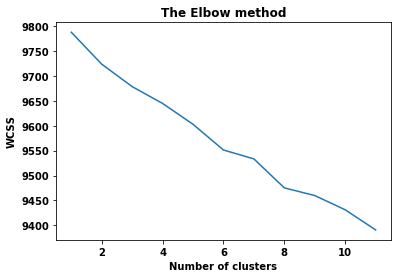

In [52]:
wcss = []

for i in range(1,12):
    kmeans = KMeans(n_clusters = i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,12),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# cluster

In [60]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
# argsort 使用方法详见： https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# common_words = kmeans.cluster_centers_.argsort() #(3,1000)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1] #(3,25)
common_words

array([[467, 642, 392, 587, 544, 981, 779, 214, 468, 176, 164, 965, 733,
         78, 488, 373, 945, 994, 967, 219, 326, 593, 928, 707, 250],
       [963, 691,  45, 467, 436, 710, 649, 665, 779, 642, 862, 335, 198,
        468, 132, 549, 899, 546, 286, 965, 262, 846, 310, 842, 631],
       [654, 680, 544,  54, 788, 250, 465, 578, 164, 294, 840, 959, 143,
        848, 334, 147, 570, 950, 691, 754, 876, 291, 594, 212, 587]])

In [69]:
def k_cluster(n_cluster,n_init=20):
    kmeans = KMeans(n_clusters = n_cluster,n_init=n_init,random_state=0)
    kmeans.fit(X3)
    return kmeans.cluster_centers_.argsort()[:,-1:-26:-1]

In [70]:
common_words = k_cluster(5)

In [71]:
for i,centroid in enumerate(common_words):
    print('class '+ str(i)+ ' :' + ','.join(word_features3[word] for word in centroid))

class 0 :plan,new,council,charg,water,man,restrict,face,murder,polic,court,rain,fund,stab,hope,land,elect,secur,shire,park,welcom,manag,consid,war,group
class 1 :war,polic,man,iraqi,say,warn,protest,claim,baghdad,kill,report,death,world,crash,anti,court,urg,miss,nsw,set,cup,troop,continu,fund,face
class 2 :iraq,war,say,missil,troop,deni,post,blair,howard,bush,destroy,pm,report,bomb,british,forc,kill,turkey,attack,aid,warn,tv,resolut,blix,uk
class 3 :govt,vic,nsw,sa,urg,fund,qld,wa,local,consid,claim,reject,fed,nt,tas,opp,say,plan,reform,deni,hospit,defend,review,issu,crean
class 4 :win,lead,season,fan,m,goal,india,award,open,hope,tiger,championship,world,gold,return,titl,thriller,cup,coast,stage,streak,best,case,celebr,waratah
